In [64]:
#These are the libraries we are going to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import plot_roc_curve, roc_auc_score , roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder , LabelEncoder
from sklearn.compose import ColumnTransformer

In [65]:
#To import data set
data1 = pd.read_csv('2006.csv')
data2 = pd.read_csv('2007.csv')

In [66]:
#merging method should have equal no. of columns
data = pd.concat([data1,data2])

In [67]:
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,N657AW,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45,13,0,NaN,0,0,0,0,0,0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,N834AW,260.0,265.0,214.0,-5.0,0.0,ATL,PHX,1587,27,19,0,NaN,0,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,N605AW,235.0,258.0,220.0,-23.0,0.0,ATL,PHX,1587,4,11,0,NaN,0,0,0,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,N312AW,152.0,158.0,126.0,-8.0,-2.0,AUS,PHX,872,16,10,0,NaN,0,0,0,0,0,0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,N309AW,171.0,163.0,132.0,0.0,-8.0,AUS,PHX,872,27,12,0,NaN,0,0,0,0,0,0


In [68]:
data['alldelay'] = data['ArrDelay']+data['DepDelay']

In [69]:
data['isdelayed'] = np.where(data['alldelay'] > 0, 1, 0)

In [70]:
#Dropping alldelay column
data = data.drop(columns = 'alldelay')

In [71]:
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,isdelayed
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,N657AW,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45,13,0,NaN,0,0,0,0,0,0,1
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,N834AW,260.0,265.0,214.0,-5.0,0.0,ATL,PHX,1587,27,19,0,NaN,0,0,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,N605AW,235.0,258.0,220.0,-23.0,0.0,ATL,PHX,1587,4,11,0,NaN,0,0,0,0,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,N312AW,152.0,158.0,126.0,-8.0,-2.0,AUS,PHX,872,16,10,0,NaN,0,0,0,0,0,0,0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,N309AW,171.0,163.0,132.0,0.0,-8.0,AUS,PHX,872,27,12,0,NaN,0,0,0,0,0,0,0


## Data wrangling

In [72]:
data.isna().sum()

Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                282682
CRSDepTime                  0
ArrTime                316047
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
TailNum                    22
ActualElapsedTime      316047
CRSElapsedTime            998
AirTime                316047
ArrDelay               316047
DepDelay               282682
Origin                      0
Dest                        0
Distance                    0
TaxiIn                      0
TaxiOut                     0
Cancelled                   0
CancellationCode     14312454
Diverted                    0
CarrierDelay                0
WeatherDelay                0
NASDelay                    0
SecurityDelay               0
LateAircraftDelay           0
isdelayed                   0
dtype: int64

In [73]:
notcancelledairplanes = data.query('Cancelled == 0 & Diverted == 0' )

In [74]:
notcancelledairplanes.isna().sum()

Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                     0
CRSDepTime                  0
ArrTime                     0
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
TailNum                     0
ActualElapsedTime           0
CRSElapsedTime              0
AirTime                     0
ArrDelay                    0
DepDelay                    0
Origin                      0
Dest                        0
Distance                    0
TaxiIn                      0
TaxiOut                     0
Cancelled                   0
CancellationCode     14279089
Diverted                    0
CarrierDelay                0
WeatherDelay                0
NASDelay                    0
SecurityDelay               0
LateAircraftDelay           0
isdelayed                   0
dtype: int64

In [75]:
notcancelledairplanes.shape

(14279090, 30)

In [76]:
#Dropping cancellation code because it only has one row
notcancelledairplanes = notcancelledairplanes.drop(columns = 'CancellationCode')

In [77]:
notcancelledairplanes.isna().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
isdelayed            0
dtype: int64

In [78]:
notcancelledairplanes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14279090 entries, 0 to 7453214
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  Diverted           int64  
 23  CarrierDelay       int64  
 24  WeatherDelay       int64  
 25  NASDelay         

In [79]:
notcancelledairplanes.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay', 'isdelayed'],
      dtype='object')

In [80]:
#removing carrierdelay,weatherdelay, nasdelay, and the other delays because you cant predict future data with them
features = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum','TailNum', 'Origin','Dest',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime','Distance', 'TaxiIn', 'TaxiOut','isdelayed']
numerical_features = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut','isdelayed']
categorical_features = ['UniqueCarrier', 'TailNum', 'Origin','Dest']

In [81]:
X = notcancelledairplanes[features].copy()


Plottings for question 5

<AxesSubplot:>

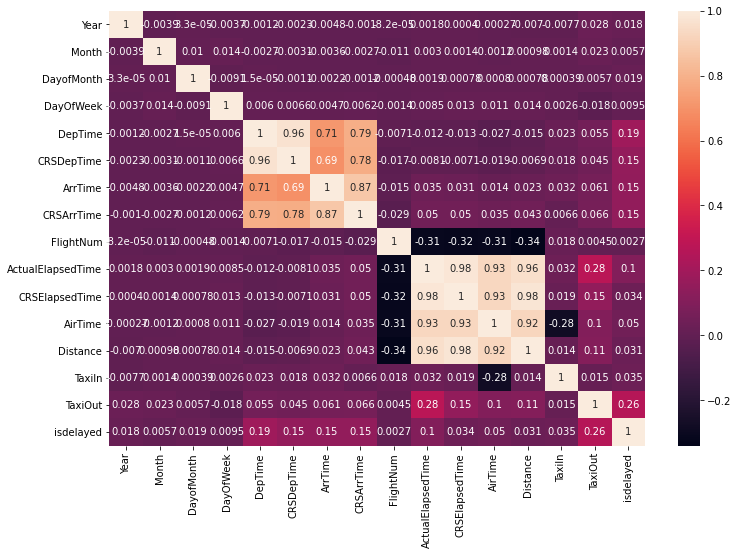

In [82]:
plt.figure(figsize = (12,8))
sns.heatmap(X.corr(),annot = True)

<AxesSubplot:>

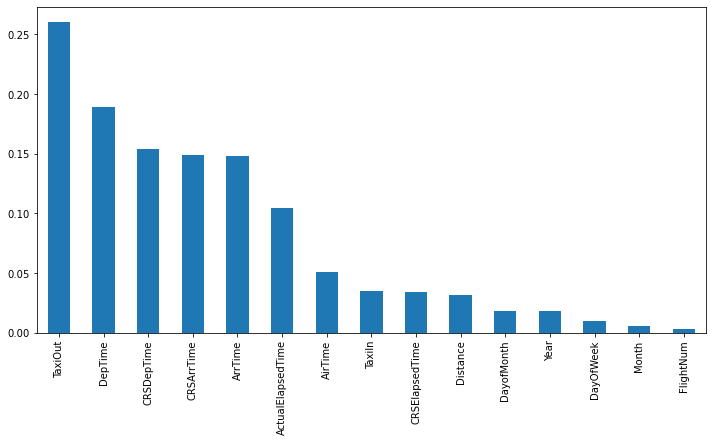

In [83]:
#correlation of all categories with isdelayed
plt.figure(figsize = (12,6))
X.corr()['isdelayed'].drop('isdelayed').sort_values(ascending = False).plot(kind = 'bar')

# Doing onehotencoder

In [84]:
#doing onehotencoder using pandas
enc_df = pd.get_dummies(X['UniqueCarrier'])

In [85]:
enc_df

,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,TZ,UA,US,WN,XE,YV
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7453210,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7453211,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7453212,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7453213,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [86]:
X = pd.concat([X, enc_df],axis = 1)

In [87]:
X.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,Origin,Dest,ActualElapsedTime,CRSElapsedTime,AirTime,Distance,TaxiIn,TaxiOut,isdelayed,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,TZ,UA,US,WN,XE,YV
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,N657AW,ATL,PHX,281.0,273.0,223.0,1587,45,13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,N834AW,ATL,PHX,260.0,265.0,214.0,1587,27,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,N605AW,ATL,PHX,235.0,258.0,220.0,1587,4,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,N312AW,AUS,PHX,152.0,158.0,126.0,872,16,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,N309AW,AUS,PHX,171.0,163.0,132.0,872,27,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Using Labelencoder instead

In [88]:
labelencoder = LabelEncoder()

In [89]:
X['Origin_enc'] = labelencoder.fit_transform(X['Origin']) 

In [90]:
X.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,Origin,Dest,ActualElapsedTime,CRSElapsedTime,AirTime,Distance,TaxiIn,TaxiOut,isdelayed,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,TZ,UA,US,WN,XE,YV,Origin_enc
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,N657AW,ATL,PHX,281.0,273.0,223.0,1587,45,13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,19
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,N834AW,ATL,PHX,260.0,265.0,214.0,1587,27,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,19
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,N605AW,ATL,PHX,235.0,258.0,220.0,1587,4,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,19
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,N312AW,AUS,PHX,152.0,158.0,126.0,872,16,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,21
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,N309AW,AUS,PHX,171.0,163.0,132.0,872,27,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,21


In [91]:
X['Dest_enc'] = labelencoder.fit_transform(X['Dest'])

In [92]:
X.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,Origin,Dest,ActualElapsedTime,CRSElapsedTime,AirTime,Distance,TaxiIn,TaxiOut,isdelayed,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,TZ,UA,US,WN,XE,YV,Origin_enc,Dest_enc
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,N657AW,ATL,PHX,281.0,273.0,223.0,1587,45,13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,19,224
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,N834AW,ATL,PHX,260.0,265.0,214.0,1587,27,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,19,224
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,N605AW,ATL,PHX,235.0,258.0,220.0,1587,4,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,19,224
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,N312AW,AUS,PHX,152.0,158.0,126.0,872,16,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,21,224
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,N309AW,AUS,PHX,171.0,163.0,132.0,872,27,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,21,224


In [93]:
X['TailNum_enc'] = labelencoder.fit_transform(X['TailNum']) 

In [94]:
X.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,Origin,Dest,ActualElapsedTime,CRSElapsedTime,AirTime,Distance,TaxiIn,TaxiOut,isdelayed,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,TZ,UA,US,WN,XE,YV,Origin_enc,Dest_enc,TailNum_enc
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,N657AW,ATL,PHX,281.0,273.0,223.0,1587,45,13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,19,224,3831
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,N834AW,ATL,PHX,260.0,265.0,214.0,1587,27,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,19,224,4993
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,N605AW,ATL,PHX,235.0,258.0,220.0,1587,4,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,19,224,3443
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,N312AW,AUS,PHX,152.0,158.0,126.0,872,16,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,21,224,1368
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,N309AW,AUS,PHX,171.0,163.0,132.0,872,27,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,21,224,1346


In [95]:
#This is to create a data set that drops certain categories in the main data set
X = X.drop(columns = categorical_features)

In [96]:
X.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Distance,TaxiIn,TaxiOut,isdelayed,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,TZ,UA,US,WN,XE,YV,Origin_enc,Dest_enc,TailNum_enc
0,2006,1,11,3,743.0,745,1024.0,1018,343,281.0,273.0,223.0,1587,45,13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,19,224,3831
1,2006,1,11,3,1053.0,1053,1313.0,1318,613,260.0,265.0,214.0,1587,27,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,19,224,4993
2,2006,1,11,3,1915.0,1915,2110.0,2133,617,235.0,258.0,220.0,1587,4,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,19,224,3443
3,2006,1,11,3,1753.0,1755,1925.0,1933,300,152.0,158.0,126.0,872,16,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,21,224,1368
4,2006,1,11,3,824.0,832,1015.0,1015,765,171.0,163.0,132.0,872,27,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,21,224,1346


In [97]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14279090 entries, 0 to 7453214
Data columns (total 40 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   FlightNum          int64  
 9   ActualElapsedTime  float64
 10  CRSElapsedTime     float64
 11  AirTime            float64
 12  Distance           int64  
 13  TaxiIn             int64  
 14  TaxiOut            int64  
 15  isdelayed          int32  
 16  9E                 uint8  
 17  AA                 uint8  
 18  AQ                 uint8  
 19  AS                 uint8  
 20  B6                 uint8  
 21  CO                 uint8  
 22  DL                 uint8  
 23  EV                 uint8  
 24  F9                 uint8  
 25  FL               

In [98]:
#data becomes X
data = X.copy()

In [99]:
#x has all features except target variable(excluding from training) .values excludes variables and makes it an array
X = data.drop(columns = 'isdelayed')


y = data['isdelayed'].values

In [100]:
#splitting between training models and test models
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20)

In [101]:
X.shape

(14279090, 39)

In [102]:
X_train.shape

(11423272, 39)

In [103]:
X_test.shape

(2855818, 39)

Scaling part

In [104]:
scaler = StandardScaler()

In [105]:
X_train_sc = scaler.fit_transform(X_train)

In [106]:
X_train_sc

array([[ 0.98125636, -0.74324193, -0.30986718, ..., -0.77183671,
        -1.61240926, -1.81151394],
       [-1.01910168, -1.62052719,  0.8280956 , ..., -1.42101193,
         0.38980095, -0.13071248],
       [ 0.98125636, -1.03567035,  0.60050304, ..., -1.62923795,
         0.41436794,  1.00970356],
       ...,
       [ 0.98125636, -1.32809877,  1.28328071, ...,  1.40841217,
        -0.86311587, -0.92280061],
       [ 0.98125636, -1.62052719, -0.65125601, ..., -0.85757683,
         1.22507882, -0.51184525],
       [-1.01910168,  0.42647175, -0.42366345, ...,  0.77148553,
         1.47074879,  0.31781935]])

In [107]:
X_train

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Distance,TaxiIn,TaxiOut,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,TZ,UA,US,WN,XE,YV,Origin_enc,Dest_enc,TailNum_enc
2304901,2007,4,13,5,1658.0,1701,1713.0,1717,5863,75.0,76.0,59.0,297,5,11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,89,20,58
93816,2006,1,23,1,1400.0,1405,1515.0,1525,2718,75.0,80.0,60.0,395,5,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,36,183,2876
1402342,2007,3,21,3,2113.0,2115,2137.0,2140,3848,84.0,85.0,54.0,332,6,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,19,185,4788
2282529,2007,4,26,4,656.0,700,749.0,803,1489,113.0,123.0,92.0,627,5,16,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,66,203,1570
4367220,2006,8,8,2,1157.0,1155,1400.0,1411,609,243.0,256.0,223.0,1745,9,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,216,162,3101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142424,2006,1,28,6,1715.0,1715,1835.0,1838,7122,80.0,83.0,48.0,284,5,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,140,47,2506
1183663,2006,3,13,1,1540.0,1540,1649.0,1655,274,69.0,75.0,59.0,417,2,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,267,251,3562
857103,2007,2,27,2,1403.0,1345,1715.0,1713,1198,132.0,148.0,114.0,948,5,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,267,81,1548
256895,2007,1,10,3,1112.0,1115,1236.0,1232,1183,144.0,137.0,132.0,853,2,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,82,251,2237


In [108]:
model = LogisticRegression()

In [109]:
#Training the model 
model.fit(X_train_sc,y_train)

LogisticRegression()

In [110]:
X_test_sc = scaler.fit_transform(X_test)

In [111]:
#have to use scaled value
predictions = model.predict(X_test_sc)

In [112]:
X_test

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Distance,TaxiIn,TaxiOut,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,TZ,UA,US,WN,XE,YV,Origin_enc,Dest_enc,TailNum_enc
4358742,2006,8,30,3,1841.0,1815,2118.0,2106,392,97.0,111.0,77.0,594,3,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,216,182,1601
5172388,2007,9,30,7,1533.0,1520,1633.0,1620,4978,60.0,60.0,38.0,94,8,14,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,224,155,4029
3809545,2006,7,1,6,1429.0,1250,1634.0,1500,1527,125.0,130.0,112.0,838,4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,146,288,3875
4738198,2006,8,19,6,1531.0,1533,1630.0,1637,945,179.0,184.0,163.0,1199,7,9,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,81,5711
3504322,2006,6,29,4,1652.0,1655,1822.0,1839,1104,90.0,104.0,74.0,432,5,11,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,79,19,5619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646138,2006,5,15,1,1043.0,1045,1208.0,1214,447,85.0,89.0,70.0,370,5,10,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,38,49,5443
3648481,2006,7,21,5,1825.0,1815,2124.0,2112,7364,119.0,117.0,87.0,577,4,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,216,123,4438
1947382,2006,4,9,7,1242.0,1245,1338.0,1350,2349,116.0,125.0,98.0,694,4,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,63,179,213
3559059,2007,6,20,3,917.0,920,1050.0,1045,5750,93.0,85.0,67.0,432,4,22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,186,211,93


In [113]:
#checking against X_test features if delayed or not
predictions

array([0, 1, 1, ..., 0, 1, 1])

In [114]:
print(confusion_matrix(y_test, predictions))

[[1314333  209247]
 [ 401534  930704]]


In [115]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81   1523580
           1       0.82      0.70      0.75   1332238

    accuracy                           0.79   2855818
   macro avg       0.79      0.78      0.78   2855818
weighted avg       0.79      0.79      0.78   2855818



Decision tree classifier for checking for better accuracy

In [116]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
model_dt = DecisionTreeClassifier()

In [118]:
model_dt.fit(X_train_sc,y_train)

DecisionTreeClassifier()

In [119]:
dt_predictions = model_dt.predict(X_test_sc)

In [120]:
print(confusion_matrix(y_test, dt_predictions))

[[1411693  111887]
 [ 116936 1215302]]


In [121]:
print(classification_report(y_test, dt_predictions))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93   1523580
           1       0.92      0.91      0.91   1332238

    accuracy                           0.92   2855818
   macro avg       0.92      0.92      0.92   2855818
weighted avg       0.92      0.92      0.92   2855818



In [122]:
#gives probability for predictions
dt_predictions_probability = model_dt.predict_proba(X_test_sc)[::,1]

In [123]:
dt_predictions_probability

array([1., 1., 1., ..., 0., 1., 1.])

In [124]:
roc_score = roc_auc_score(y_test, dt_predictions_probability)

ROC curves for question 5

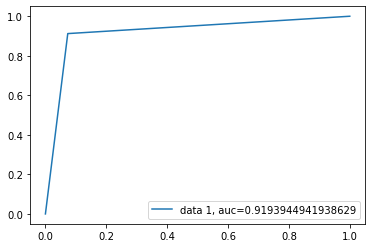

In [125]:
#fpr = false positive rate, tpr = true positive rate
fpr, tpr, _ = roc_curve(y_test, dt_predictions_probability)
auc = roc_auc_score(y_test, dt_predictions_probability)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

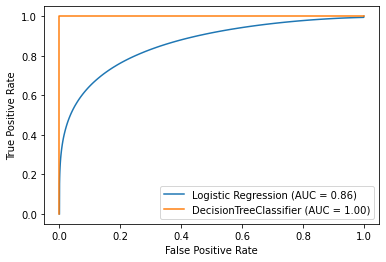

In [126]:
ax = plt.gca()
plot_roc_curve(model, X_train_sc,y_train, ax=ax, name='Logistic Regression') 
plot_roc_curve(model_dt, X_train_sc,y_train, ax=ax, name='DecisionTreeClassifier')
plt.show()